#**Business Process Improvement: SBA Loan Charge-Off Analysis**
BA810: Supervised Machine Learning
<br>
Professor Nachiketa Sahoo
<br>
Cohort B Team 13
<br>
Team Members: Boyuan (Daniel) Zhang, Yutao Luo, Yen-Chun (Albert) Chen, Xinyuan (Klaus) Xu
***

##**1. Problem Definition**

###**1.1 Background Information**

According to the annual report from the United States Census Bureau, **Small Business Administration (SBA)** classifies small businesses as entities with annual revenue ranging from \$1 million to \$40 million, and a number of hired employees ranging from 100 to over 1,500. Additionally, there are 32.5 million small businesses in the US, and the number is quickly growing in the nowadays post-pandemic time. Based on the public information on SBA official website, small business owners apply for loans through banks or credit unions (lending partners) to advance their business, and the lending partners then apply to SBA for a loan guarantee. Therefore, in case of loans defaulting for various reasons, the SBA will pay back their partners instead of letting them be exposed to such defaulting risk.

###**1.2 Project Goal**
Based on a survey done by the Federal Reserve Bank, 54% of US small businesses applied for a loan or a line of credit in 2018. According to Kevin Voigt and Caren Weiner Campbell's article on nerdwallet, 17.4% of SBA-guaranteed loans from 2006 to 2015 went to default. Therefore, in our project, we aim at improving the process of loan lending from SBA's perspective. We try to build predictive models using variables that a lending partners might need to provide to the SBA about the businesses themselves. **Our goal is to predict whether a SBA-backed loan to a US small business will be paid in full or charged-off using selected data, compare prediction results across different models, and make recommendations to the SBA about updating their existing model on choosing which loans to guarantee on.**


###**1.3 Intended Audience**
The audience who place the most significant value on this analysis should be the SBA. Although we are aware that SBA probably have certain predictive models that detect whether an outgoing loan is going to default, we are trying to build models that could potentially be used in **both government entities and commerical banks**, or any entity that has a lending process with data gathering capabilities.
***

##**2. Data Preparation**

###**2.1 Data Source**
**Raw Data:**
<br>
The raw data is from U.S. Small Business Administration Open Data (public): 
<br>
__[U.S. Small Business Administration (SBA) | Open Data Statistics](https://data.sba.gov/dataset/sba-public-datasets)__

**Modified Data:**
<br>
The data we analyzed in this project was modified by Mirbek Toktogaraev, a Junior Data Analyst at Ubiqum Code Academy (Madrid, Spain.) The processed data is accessable on Kaggle.com. 
<br>
__[Should This Loan be Approved or Denied? -by Mirbek Toktogaraev](https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied?datasetId=558648&sortBy=voteCount)__


###**2.2 Data Loading**

In [ ]:
# Mount Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data from Google Drive as raw data.
import pandas as pd
raw_data = pd.read_csv('/content/drive/My Drive/BA810/Project/SBAnational.csv')

# Show the first 10 rows of raw data
pd.set_option('display.max_columns', None) # Showing all columns.
raw_data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [ ]:
# Display the raw data information.
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

###**2.3 Data Cleaning**

In [ ]:
# Start by dropping borrower & bank's basic information("Name", "City", "Zip", etc) since our analysis consider them to be less relevant.
data = raw_data.drop(['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank'], axis = 1) 
# Leavning "State" and "BankState" to check if borrower went to a bank in the state of their business.

# Checking all null values in the remaining columns. 
data.isnull().sum()
# Notice there are a large number of null values in "ChgOffDate", suggesting not all loans were charged-off. 

State                    14
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
# Drop the null values in selected columns. 
data.dropna(subset = ['State', 'BankState', 'NewExist', 'RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace = True) 
# Note: drop null values in "DisbursementDate" since we can not analyze loans that were never disbursed.

# Drop "ChgOffDate" and "ChgOffPrinGr" since once we use these columns, 
# they would definitely have an one-on-one effect on predicting "MIS_Status".
# This is very important for later analysis to function. 
data.drop(columns = ["ChgOffDate", "ChgOffPrinGr"], inplace = True) 

# Re-check for null values.
data.isnull().sum()

State                0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
GrAppv               0
SBA_Appv             0
dtype: int64

In [ ]:
# Drop the "ApprovalDate" and "'DisbursementDate" columns since they have become obselete now. 
data.drop(columns = ['ApprovalDate', 'DisbursementDate'], inplace = True)

In [ ]:
# Remove of the "$" sign in numerical variables and change the data type.
data['DisbursementGross'] = data['DisbursementGross'].str.replace('$', '').str.replace(',', '').astype(float)
data['BalanceGross'] = data['BalanceGross'].str.replace('$', '').str.replace(',', '').astype(float)
data['GrAppv'] = data['GrAppv'].str.replace('$', '').str.replace(',', '').astype(float)
data['SBA_Appv'] = data['SBA_Appv'].str.replace('$', '').str.replace(',', '').astype(float)

<ipython-input-7-ce91fb644fe3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['DisbursementGross'] = data['DisbursementGross'].str.replace('$', '').str.replace(',', '').astype(float)
<ipython-input-7-ce91fb644fe3>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['BalanceGross'] = data['BalanceGross'].str.replace('$', '').str.replace(',', '').astype(float)
<ipython-input-7-ce91fb644fe3>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['GrAppv'] = data['GrAppv'].str.replace('$', '').str.replace(',', '').as

In [ ]:
# Clean up the "ApprovalFY" column.
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x
data['ApprovalFY'] = data['ApprovalFY'].apply(clean_str).astype('int64')

In [ ]:
# Check the categorical variables and add new columns showing their values as 0 and 1.

# Check unique values in "NewExist" column.
import numpy as np
data['NewExist'].unique()
# Since new businesses have a value of 2 and existing with 1, 
#drop the 0 values in "NewExist" column since it does not make sense. 
data = data[data['NewExist'] >= 1] 
# Create a new column "NewOrExist" based on "NewExist" with values of 1 and 0. 
data['NewOrExist'] = np.where(data['NewExist'] == 2, 1, 0)

# Create a new column "StateSame" to check if the borrower's state matches the issuer's (partner's) state 
data['StateSame'] = np.where(data['State'] == data['BankState'], 1, 0)

# Create a new column "FullDisbursed" to check if the amount disbursed equals to the amount approved by the bank.
data['FullDisbursed'] = np.where(data['DisbursementGross'] == data['GrAppv'], 1, 0)

# Check the "FranchiseCode" column.
data['FranchiseCode'].unique()
# Change values larger or equal to 1 into Franchised.
data['Franchised'] = np.where(data['FranchiseCode'] == 0, 0, 1)

# Check the "RevLineCr" column. 
data['RevLineCr'].unique()
# Leave only values of Yes and No.
data = data[(data['RevLineCr'] == 'Y' ) | (data['RevLineCr'] == 'N')]
data['RevLineCredit'] = np.where(data['RevLineCr'] == 'Y', 1, 0)

# Check the "LowDoc" column.
data['LowDoc'].unique()
# Leave only values of Yes and No.
data = data[(data['LowDoc'] == 'Y' ) | (data['LowDoc'] == 'N')]
data['LowDocP'] = np.where(data['LowDoc'] == 'Y', 1, 0)

# Check the unique values in "MIS_Status".
data['MIS_Status'].unique()
# Change the values of MIS_Status into 1 and 0, label its column: "MIS"
data['MIS'] = np.where(data['MIS_Status'] == 'CHGOFF', 1, 0)

<ipython-input-9-3e3eb9c8a2df>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NewOrExist'] = np.where(data['NewExist'] == 2, 1, 0)
<ipython-input-9-3e3eb9c8a2df>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RevLineCredit'] = np.where(data['RevLineCr'] == 'Y', 1, 0)


0.0         610217
827875.0         1
25000.0          1
37100.0          1
43127.0          1
84617.0          1
1760.0           1
996262.0         1
Name: BalanceGross, dtype: int64


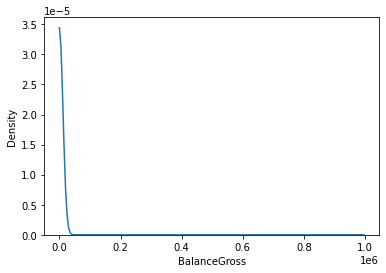

In [ ]:
# Check the values in "BalanceGross" column
print(data['BalanceGross'].value_counts())

# Check the distribution in "BalanceGross" column
import seaborn as sns
sns.kdeplot(data = data, x = "BalanceGross", bw_adjust = 100, cut = 0)

In [ ]:
# There are too many values of 0, and the distribution appears to be skewed to the very left, so we decide to drop the column. 
data.drop(columns = 'BalanceGross', inplace = True)

# Drop the columns that were used to process, now they have just become duplicates.
data.drop(columns = ['State', 'BankState','NewExist', 'DisbursementGross', 'GrAppv', 'FranchiseCode', 
                     'RevLineCr', 'LowDoc', 'MIS_Status'], inplace = True)

In [ ]:
# Re-check the head of the data.
data.head()

,NAICS,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,SBA_Appv,NewOrExist,StateSame,FullDisbursed,Franchised,RevLineCredit,LowDocP,MIS
0,451120,1997,84,4,0,0,0,48000.0,1,0,1,1,0,1,0
1,722410,1997,60,2,0,0,0,32000.0,1,1,1,1,0,1,0
2,621210,1997,180,7,0,0,0,215250.0,0,1,1,1,0,0,0
3,0,1997,60,2,0,0,0,28000.0,0,1,1,1,0,1,0
4,0,1997,240,14,7,7,0,229000.0,0,1,1,1,0,0,0


##**3. Exploring Features**

###**3.1 Correlation Heatmap**

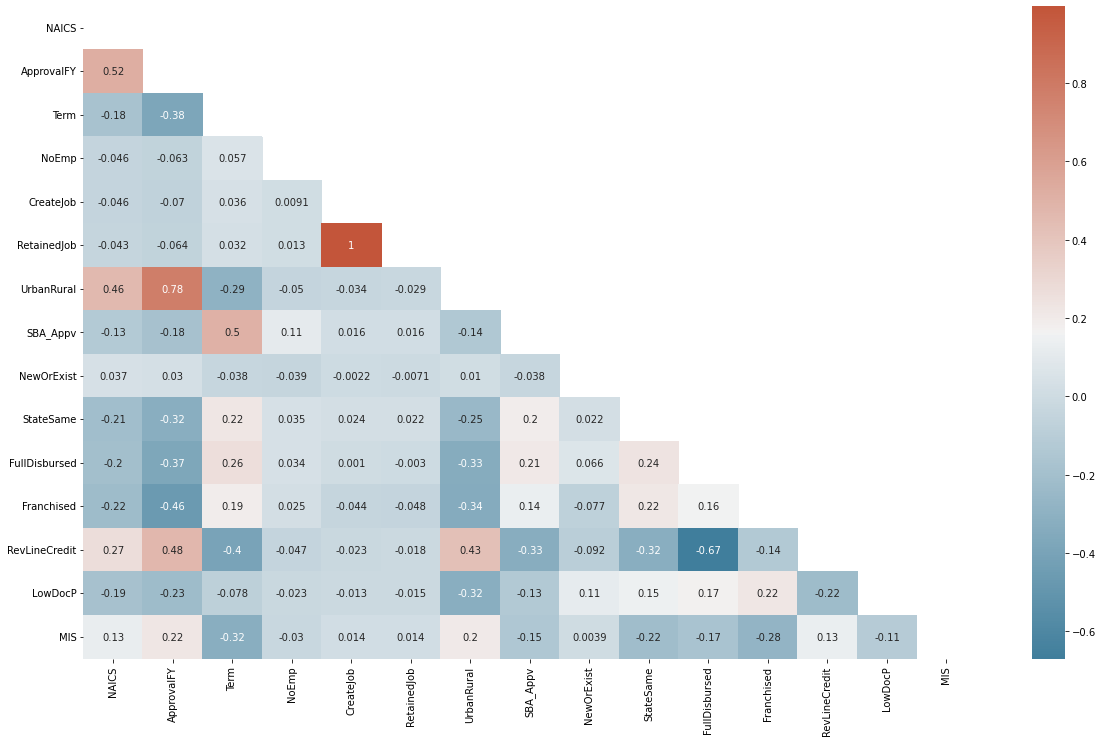

In [ ]:
# Build a correlation heatmap 
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size and mask for upper triangle
corr = data.corr()
f, ax = plt.subplots(figsize = (20, 12))
mask = np.triu(np.ones_like(corr, dtype = int))

# Build the colormap
cmap = sns.diverging_palette(230, 20, as_cmap = True)
# Draw the heatmap
sns.heatmap(corr, annot = True, mask = mask, cmap = cmap)

In [ ]:
# 3.1 Finding
#a. `RetainedJob` seem to be very strongly correlated with `CreateJob`, we could keep only one for the purpose of this analysis.
#b. `UrbanRural` seem to be positively and strongly correlating with `ApprovalFY`, we can later develop a graph to further analyze it.
#c. `SBA_Appv` seem to be mildly and positively correlated with `Term`, which suggests the amount approved by SBA could be based on the term of loans.
#d. No column seem to be strongly correlating with `MIS`.

###**3.2 Approval Year and Amount for Urban/Rural Loans**

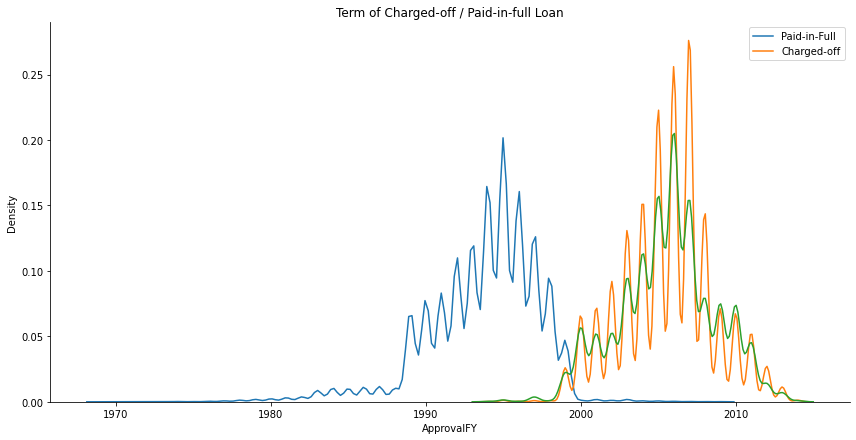

In [ ]:
# Construct the distribution of approved loans by each year.
graph = sns.FacetGrid(data, hue = 'UrbanRural', height = 6, aspect = 2)

# Map using a kdeplot 
graph.map(sns.kdeplot, 'ApprovalFY')

# Construct legend and title
plt.legend()
plt.title('Term of Charged-off / Paid-in-full Loan')
plt.legend(labels = ['Paid-in-Full', 'Charged-off'])
plt.show()

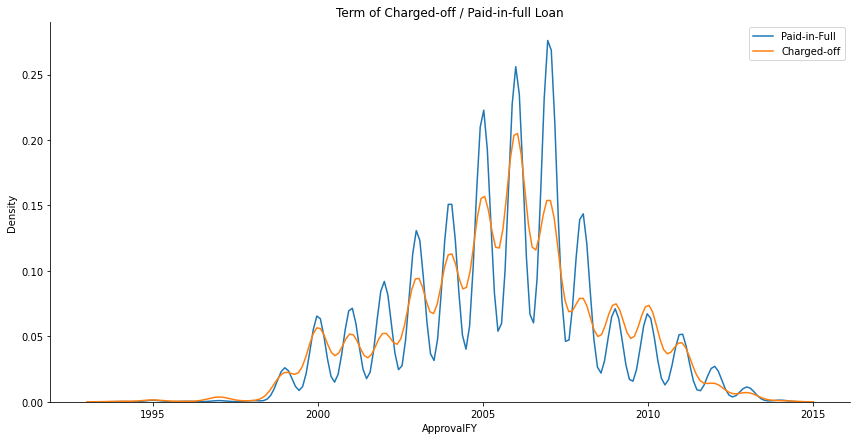

In [ ]:
# Suppress the data where SBA does not know whether it was a urban loan or a rural loan, they seem to be all approved before 2000.
data_select = data[data['UrbanRural'] !=  0]
graph = sns.FacetGrid(data_select, hue = 'UrbanRural', height = 6, aspect = 2)

# Map using a kdeplot 
graph.map(sns.kdeplot, 'ApprovalFY')

# Construct legend and title
plt.legend()
plt.title('Term of Charged-off / Paid-in-full Loan')
plt.legend(labels = ['Paid-in-Full', 'Charged-off'])
plt.show()

In [ ]:
#3.2 Finding
#There has been consistently more loans paid off than charged off before the great financial crisis in 2008. 
#It seems like small business took a hit around 2007 to 2012 as less loans are approved, 
#and more loans are charged off compared to the ones being paid-off. 

###**3.3 Totals Loan Charge-Off of New/Existing Business**

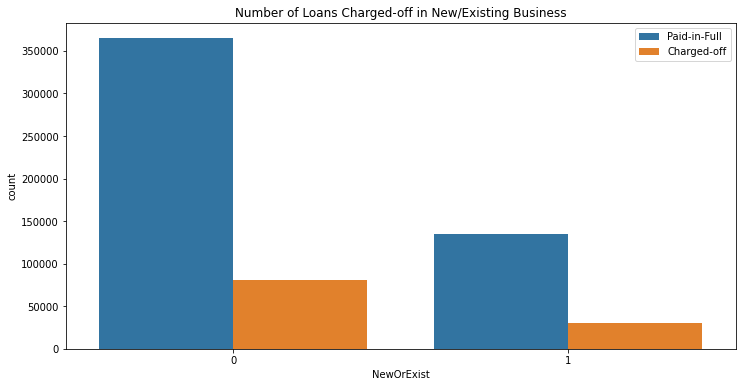

In [ ]:
# Set up figure size.
plt.figure(figsize=(12, 6))

# Construct countplot. 
sns.countplot(x="NewOrExist", hue = "MIS", data = data)
plt.legend(labels = ['Paid-in-Full', 'Charged-off'])
plt.title('Number of Loans Charged-off in New/Existing Business')
plt.show()

In [ ]:
#3.3 Finding
#Apparently there are more existing businesses, respectively, there are more loans getting charged-off. 
#The percentage of loan getting charged-off in each type of businesses seem roughly the same. 

###**3.3 Terms of Charged-off/Paid-in-Full Loans**

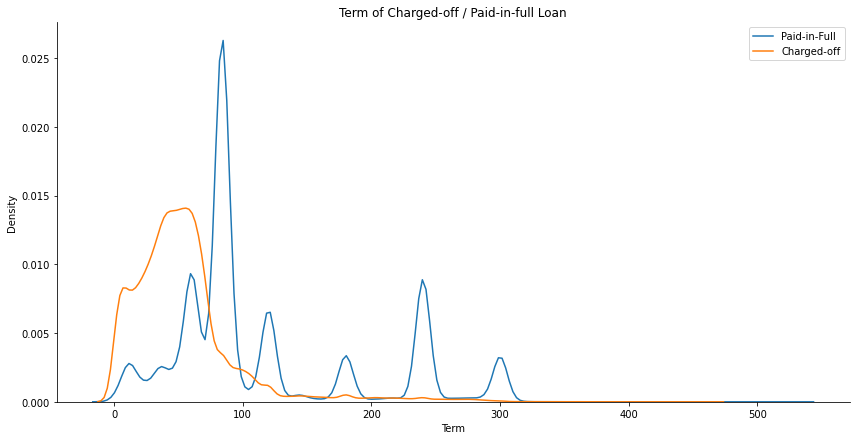

In [ ]:
# Set up FacetGrid
graph = sns.FacetGrid(data, hue = 'MIS', height = 6, aspect = 2)

# Map using a kdeplot 
graph.map(sns.kdeplot, 'Term')

# Construct legend and title
plt.legend(labels = ['Paid-in-Full', 'Charged-off'])
plt.title('Term of Charged-off / Paid-in-full Loan')
plt.show()

In [ ]:
#3.4 Finding
#According to the graph, shorter termed loans tend to be charged-off while longer loans are paid in full.

###**3.5** Term Factor vs. Retained Job in Charged-Off Loans

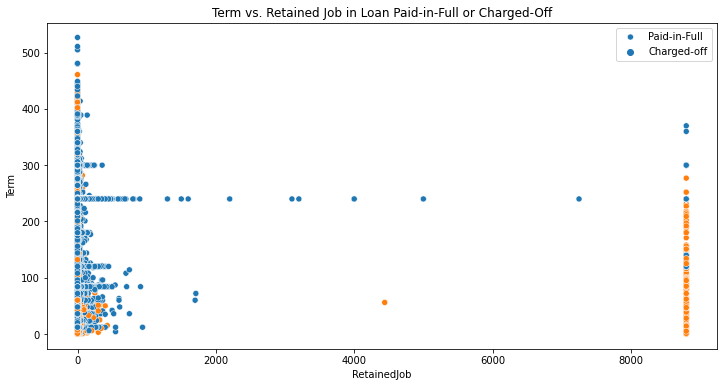

In [ ]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data = data, x = 'RetainedJob', y = 'Term', hue = "MIS", legend = True)
plt.legend(labels = ['Paid-in-Full', 'Charged-off'])
plt.title('Term vs. Retained Job in Loan Paid-in-Full or Charged-Off')
plt.show()

In [ ]:
#3.5 Finding
#From the graph, we could directly tell that businesses that have retained more jobs have largely had their loans charged-off, while businesses 
#with few retained job have to pay back in full. The reason for this vary, it could be since the government have beneficial programs that allow 
#buiness that retain jobs to carry less loan paymnents. 

##**4. Pre-Processing Pipeline**

###**4.1 Sample Data Selection**

In [ ]:
# Based on our feature exploration, we add a new column "FinanCrisis" to detect if the loan was approved during the 2008 financial crisis. 
data['FinanCrisis'] = np.where(data['ApprovalFY'] == 2008, 1, 0)
data.head()

,NAICS,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,SBA_Appv,NewOrExist,StateSame,FullDisbursed,Franchised,RevLineCredit,LowDocP,MIS,FinanCrisis
0,451120,1997,84,4,0,0,0,48000.0,1,0,1,1,0,1,0,0
1,722410,1997,60,2,0,0,0,32000.0,1,1,1,1,0,1,0,0
2,621210,1997,180,7,0,0,0,215250.0,0,1,1,1,0,0,0,0
3,0,1997,60,2,0,0,0,28000.0,0,1,1,1,0,1,0,0
4,0,1997,240,14,7,7,0,229000.0,0,1,1,1,0,0,0,0


In [ ]:
# Select the columns into a new dataframe to build models.
# Note here that we drop "CreateJob" column for its correlation of 1 with "RetainedJob".
df = data[['Term', 'NoEmp', 'RetainedJob', 'UrbanRural',
           'SBA_Appv', 'NewOrExist',	'StateSame', 'FinanCrisis',
           'FullDisbursed', 'Franchised',	'RevLineCredit', 'LowDocP',	'MIS']]

# Check the shape of the model. 
print(df.shape)
# Check for null values.
print(df.isnull().sum())

(610224, 13)
Term             0
NoEmp            0
RetainedJob      0
UrbanRural       0
SBA_Appv         0
NewOrExist       0
StateSame        0
FinanCrisis      0
FullDisbursed    0
Franchised       0
RevLineCredit    0
LowDocP          0
MIS              0
dtype: int64


In [ ]:
# Randomly select a fracture of the dataframe. 
np.random.seed(810)

# We think a sample size between 10,000 to 13,000 should function the best. 
df_sample = df.sample(n = np.random.randint(10000, 13000), random_state = 11)

# Check the head of the new dataframe 
df_sample.head()
print(df_sample.shape)

(12965, 13)


In [ ]:
# Check the shape of the new dataframe. 
print('There are', df_sample.shape[0],'rows in the sample dataframe and', df_sample.shape[1], 'columns', end = '.')

There are 12965 rows in the sample dataframe and 13 columns.

###**4.2 Numerical vs. Categorical Variables**

###**4.3 Numerical Variable Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import set_config

# Shows the pipeline structure.
set_config(display = 'diagram') 

# Building the numerical feature pipeline. 
num_pipeline = Pipeline([
        ("Imputer", SimpleImputer(strategy = "median")),
        ("Scaler", StandardScaler())
    ])

# Display pipeline.
num_pipeline

Pipeline(steps=[('Imputer', SimpleImputer(strategy='median')),
                ('Scaler', StandardScaler())])

###**4.4 Categorical Variable Pipeline**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Building hte categorical feature pipeline. 
cat_pipeline = Pipeline([
        ("Imputer", SimpleImputer(strategy = "most_frequent")),
        ("Cat_Encoder", OneHotEncoder(sparse = False, drop = "first"))
    ])

cat_pipeline

Pipeline(steps=[('Imputer', SimpleImputer(strategy='most_frequent')),
                ('Cat_Encoder', OneHotEncoder(drop='first', sparse=False))])

###**4.5 Pre-Processing Pipeline**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression


# Define the numerical and categorical variables.
num_variables = ['Term', 'NoEmp', 'RetainedJob', 'SBA_Appv']
cat_variables = ['UrbanRural', 'NewOrExist', 'Franchised', 'StateSame', 'FinanCrisis', 
                 'FullDisbursed',	'RevLineCredit', 'LowDocP']

# Build pre-processing pipeline. 
preprocessing = ColumnTransformer([ ("Numerical", num_pipeline, num_variables), ("Categorical", cat_pipeline, cat_variables )])

preprocess_pipeline = Pipeline([ ('Preprocessing', preprocessing),
                                      ('Select', SequentialFeatureSelector(LinearRegression(), n_features_to_select= 1))])

preprocess_pipeline

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['Term', 'NoEmp',
                                                   'RetainedJob', 'SBA_Appv']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Cat_Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['UrbanRural', 'NewOrExist',
                                                   'Franchised', 'StateSame',
                                                   'FinanCrisis',
                                                   'FullDisbursed',
                                                   'RevLineCredit',
                                                   'LowDocP'])])),
                ('Select',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=1))])

##**5. Predictive Models**

###**5.1 Train-Test Spliting**

In [ ]:
# Split the train-test data. 
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_sample, test_size = .25, random_state = 11)

# Display shape of train and test dataset.
train_data.shape, test_data.shape

((9723, 13), (3242, 13))

###**5.2 Data Preparation**
Fitting data into Pre-Processing Pipelines. 

In [ ]:
# Define X and y variables from the training dataset. 
df_X = train_data.drop("MIS", axis = 1)
df_y = train_data["MIS"]

# Fit data into preprocessing pipeline. 
X_train = preprocess_pipeline.fit_transform(df_X, df_y) # Feature selection requires df_y to be put here. 
y_train = df_y.values

# Define X and y variables from the testing dataset. 
X = test_data.drop("MIS", axis = 1)
y = test_data["MIS"]

# Fit data into preprocessing pipeline. 
X_test = preprocess_pipeline.fit_transform(X, y) # Feature selection requires y to be put here. 
y_test = y.values

###**5.3 Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Fit a Logistic Regression model on the training dataset. 
logistic = LogisticRegression(random_state = 11)
logistic.fit(X_train, y_train)

LogisticRegression(random_state=11)

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Prediciting using a Logistic Regression model. 
y_pred = logistic.predict(X_test)

# Checking for accuracy.
accuracy_score(y_test, y_pred)

0.811844540407156

In [ ]:
from sklearn.model_selection import cross_val_score

# Check for balanced accuracy score with cross validation. 
logistic_scores = cross_val_score(logistic, X_test, y_test, cv = 10, scoring = 'balanced_accuracy')
logistic_scores.mean().round(3)

0.542

In [ ]:
# Check for RMSE score.
logistic_rmses = -cross_val_score(logistic, X_test, y_test, cv = 10, scoring = "neg_root_mean_squared_error")
logistic_rmses.mean().round(3)

0.437

###**5.4 Support Vector Classifier (SVC)**

####**5.4.1 SCV(kernel = linear)**

In [ ]:
from sklearn.svm import SVC

#Fit a SVC model on the training dataset with "linear" as its kernel.
svc_linear = SVC(kernel = 'linear', gamma = "auto")
svc_linear.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
# Check for balanced accuracy score with cross validation. 
# svc_linear_scores = cross_val_score(svc_linear, X_test, y_test, cv = 10, scoring = 'balanced_accuracy')
# svc_linear_scores.mean().round(3)

# It takes more than 10 minutes to run this model, so we decided to skip it for this project.
# We would surely run it after the semester is over.

####**5.4.2 SCV(kernel = poly)**

In [ ]:
# Fit a SVC model on the training dataset with "poly" as its kernel.
svc_poly = SVC(kernel = 'poly', gamma = "auto")
svc_poly.fit(X_train, y_train)

SVC(gamma='auto', kernel='poly')

In [ ]:
# Check for balanced accuracy score with cross validation. 
#svc_poly_scores = cross_val_score(svc_poly, X_test, y_test, cv = 10, scoring = 'balanced_accuracy')
#svc_poly_scores.mean().round(3)

# This one also takes more than 10 minutes to run this model, so we decided to skip it for this project.
# We would surely run it after the semester is over.

####**5.4.3 SVC (kernel = rbf)**

In [ ]:
# Fit a SVC model on the training dataset with "rbf" as its kernel.
svc_rbf = SVC(kernel = 'rbf', gamma = "auto")
svc_rbf.fit(X_train, y_train)

SVC(gamma='auto')

In [ ]:
# Check for balanced accuracy score with cross validation. 
svc_rbf_scores = cross_val_score(svc_rbf, X_test, y_test, cv = 10, scoring = 'balanced_accuracy')
svc_rbf_scores.mean().round(3)

0.505

In [ ]:
# Check for RMSE score.
svc_rbf_rmses = -cross_val_score(svc_rbf, X_test, y_test, cv = 10, scoring = "neg_root_mean_squared_error")
svc_rbf_rmses.mean().round(3)

0.43

###**5.5 K-Nearest-Neighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Fit a kNN model on the training dataset. 
knn = KNeighborsClassifier( )
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Check for balanced accuracy score with cross validation.
knn_scores = cross_val_score(knn, X_test, y_test, cv = 10, scoring = 'balanced_accuracy')
knn_scores.mean().round(3)

0.842

In [ ]:
# Check for RMSE score.
knn_rmses = -cross_val_score(knn, X_test, y_test, cv = 10, scoring = "neg_root_mean_squared_error")
knn_rmses.mean().round(3)

0.299

###**5.6 Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Fit a Decision Tree Classifier on the training dataset.
tree = DecisionTreeClassifier(random_state = 11)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [ ]:
# Check for balanced accuracy score with cross validation.
tree_scores = cross_val_score(tree, X_test, y_test, cv = 10, scoring = 'balanced_accuracy')
tree_scores.mean().round(3)

0.868

In [ ]:
# Check for RMSE score.
tree_rmses = -cross_val_score(tree, X_test, y_test, cv = 10, scoring = "neg_root_mean_squared_error")
tree_rmses.mean().round(3)

0.279

###**5.7 Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Fit a Randome Forest Classifier model on the training dataset. 
forest_clf = RandomForestClassifier(n_estimators = 100, random_state = 11)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=11)

In [ ]:
# Check for balanced accuracy score with cross validation.
forest_scores = cross_val_score(forest_clf, X_test, y_test, cv = 10, scoring = 'balanced_accuracy')
forest_scores.mean().round(3)

0.87

In [ ]:
# Check for RMSE score.
forest_rmses = -cross_val_score(forest_clf, X_test, y_test, cv = 10, scoring = "neg_root_mean_squared_error")
forest_rmses.mean()

0.28076231614614733

###**5.8 XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier

# Fit a Xgboost model on the training dataset. 
xgb = XGBClassifier(n_estimators = 100, random_state = 11)
xgb.fit(X_train, y_train)

XGBClassifier(random_state=11)

In [ ]:
# Check for balanced accuracy score with cross validation.
xgb_scores = cross_val_score(xgb, X_test, y_test, cv = 10, scoring = 'balanced_accuracy')
xgb_scores.mean().round(3)

0.854

In [ ]:
# Check for RMSE score.
xgboost_rmses = -cross_val_score(xgb, X_test, y_test, cv = 10, scoring = "neg_root_mean_squared_error")
xgboost_rmses.mean().round(3)

0.291

###**5.9 Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('Decision_tree', DecisionTreeClassifier(random_state = 11)),
        ('Random_forest', RandomForestClassifier(n_estimators = 100, random_state = 11)),
        ('Xgboost', XGBClassifier(n_estimators = 100, random_state = 11))])

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('Decision_tree',
                              DecisionTreeClassifier(random_state=11)),
                             ('Random_forest',
                              RandomForestClassifier(random_state=11)),
                             ('Xgboost', XGBClassifier(random_state=11))])

In [ ]:
voting_scores = cross_val_score(voting_clf, X_test, y_test, cv = 10, scoring = 'balanced_accuracy')
voting_scores.mean().round(3)

0.868

In [ ]:
# Check for RMSE score.
voting_rmses = -cross_val_score(voting_clf, X_test, y_test, cv = 10, scoring = "neg_root_mean_squared_error")
voting_rmses.mean().round(3)

0.28

###**5.10 Stacking Classifier**

In [ ]:
from sklearn.ensemble import StackingClassifier
stacking_clf = StackingClassifier(
    estimators=[
        ('Decision_tree', DecisionTreeClassifier(random_state = 11)),
        ('Random_forest', RandomForestClassifier(n_estimators = 100, random_state = 11)),
        ('Xgboost', XGBClassifier(n_estimators = 100, random_state = 11))], 
        final_estimator = LogisticRegression(random_state = 11), cv=5 )

stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision_tree',
                                DecisionTreeClassifier(random_state=11)),
                               ('Random_forest',
                                RandomForestClassifier(random_state=11)),
                               ('Xgboost', XGBClassifier(random_state=11))],
                   final_estimator=LogisticRegression(random_state=11))

In [ ]:
# Check for balanced accuracy score.
stacking_scores = cross_val_score(stacking_clf, X_test, y_test, cv = 10, scoring = 'balanced_accuracy')
stacking_scores.mean().round(3)

0.856

In [ ]:
# Check for RMSE score.
stacking_rmses = -cross_val_score(stacking_clf, X_test, y_test, cv = 10, scoring = "neg_root_mean_squared_error")
stacking_rmses.mean().round(3)

0.289

###**5.11 Bagging Classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators = 500, 
                            oob_score=True, 
                            n_jobs=-1, random_state = 11)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True, random_state=11)

In [ ]:
# Check for balanced accuracy score.
bag_scores = cross_val_score(bag_clf, X_test, y_test, cv = 10, scoring = 'balanced_accuracy')
bag_scores.mean().round(3)

0.869

In [ ]:
# Check for RMSE score.
bag_rmses = -cross_val_score(bag_clf, X_test, y_test, cv = 10, scoring = "neg_root_mean_squared_error")
bag_rmses.mean().round(3)

0.281

###**5.9 Compare Different Classifiers**

In [ ]:
# Develop a dataframe with accuracy scores and rmse. 
d = {'Logistic': [logistic_scores.mean().round(3), logistic_rmses.mean().round(3)], 
    'SVC': [svc_rbf_scores.mean().round(3), svc_rbf_rmses.mean().round(3)],
    'kNN': [knn_scores.mean().round(3), knn_rmses.mean().round(3)],
    'DecisionTree': [tree_scores.mean().round(3), tree_rmses.mean().round(3)],
    'RandomForest': [forest_scores.mean().round(3), forest_rmses.mean().round(3)],
    'XGBoost': [xgb_scores.mean().round(3), xgboost_rmses.mean().round(3)],
    'Voting': [voting_scores.mean().round(3), voting_rmses.mean().round(3)],
    'Stacking': [stacking_scores.mean().round(3), stacking_rmses.mean().round(3)],
    'Bagging': [bag_scores.mean().round(3), bag_rmses.mean().round(3)],   
     }
models = pd.DataFrame(data = d).transpose()
models = models.rename(columns={ 0: 'Balanced_Accuracy', 1: 'RMSE'})
models.head()

,Balanced_Accuracy,RMSE
Logistic,0.542,0.437
SVC,0.505,0.430
kNN,0.842,0.299
DecisionTree,0.868,0.279
RandomForest,0.870,0.281


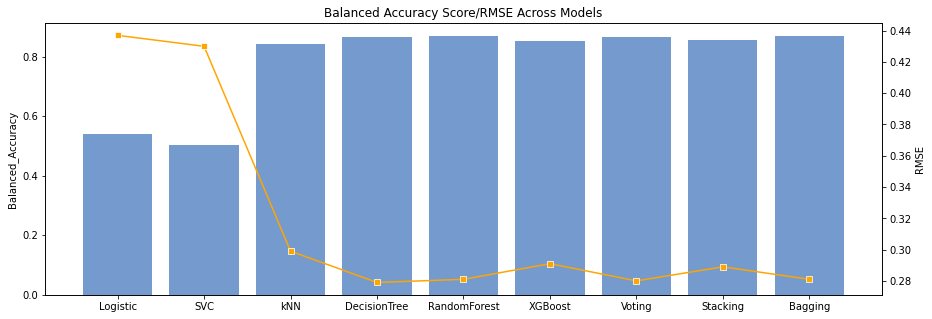

In [ ]:
# Graph the changes in different scores with a barplot and a lineplot
fig=plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

sns.barplot(x = models.index, y = models['Balanced_Accuracy'],data = models,color = '#69d',ax = ax1)
sns.lineplot(x= models.index, y = models['RMSE'],data = models, marker = 's',color = 'orange',ax=ax2)

plt.xticks()
plt.title('Balanced Accuracy Score/RMSE Across Models')
plt.show()

In [ ]:
# Check which models are the more accurate. 
models.sort_values(by = 'Balanced_Accuracy')

,Balanced_Accuracy,RMSE
SVC,0.505,0.430
Logistic,0.542,0.437
kNN,0.842,0.299
XGBoost,0.854,0.291
Stacking,0.856,0.289
DecisionTree,0.868,0.279
Voting,0.868,0.280
Bagging,0.869,0.281
RandomForest,0.870,0.281


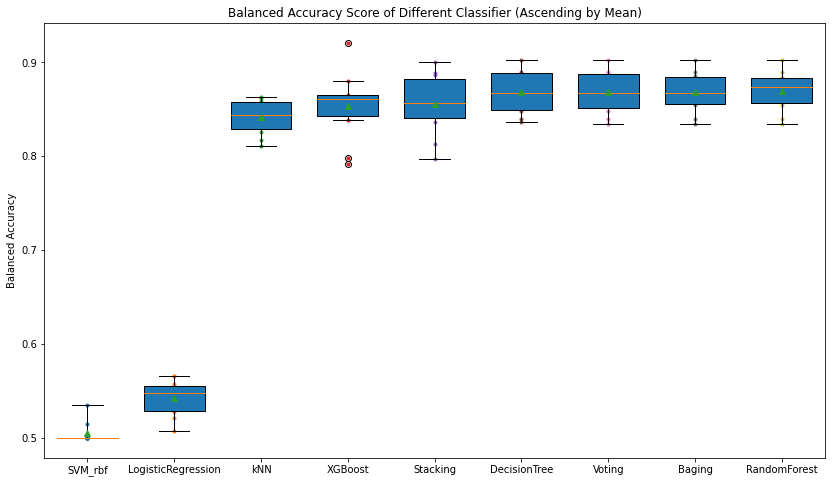

In [ ]:
import matplotlib.pyplot as plt
# Set figure size.
plt.figure(figsize=(14, 8))

plt.plot([1] * 10, svc_rbf_scores, ".") 
plt.plot([2] * 10, logistic_scores, ".") 
plt.plot([3] * 10, knn_scores, ".") 
plt.plot([4] * 10, xgb_scores, ".") 
plt.plot([5] * 10, stacking_scores, ".") 
plt.plot([6] * 10, tree_scores, ".") 
plt.plot([7] * 10, voting_scores, ".")
plt.plot([8] * 10, bag_scores, ".")
plt.plot([9] * 10, forest_scores, ".")

# Construct box plot showing which model has the highest score.
plt.boxplot([svc_rbf_scores, logistic_scores,  knn_scores, xgb_scores, 
             stacking_scores, tree_scores, voting_scores,
             bag_scores, forest_scores ] , 
            labels=('SVM_rbf', 'LogisticRegression', 'kNN', 'XGBoost','Stacking', 'DecisionTree', 
                    'Voting', 'Baging', 'RandomForest'), 
            widths = 0.7, patch_artist = True, autorange = True, showmeans = True )
plt.ylabel("Balanced Accuracy")
plt.title('Balanced Accuracy Score of Different Classifier (Ascending by Mean)')
plt.show()

###**5.10 Evaluating Random Forest Classifier & Baging Classifier**

####**5.10.1 Confusion Matrix**

Text(0.5, 1.0, 'Random Forest Classifier')

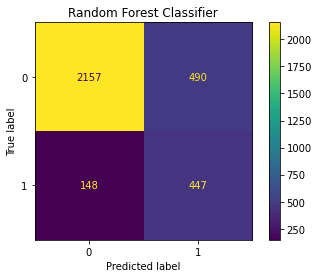

In [ ]:
# Evaluate models with confusion matrix. 
from sklearn.metrics import ConfusionMatrixDisplay

# Display the maxtrix. 
forest_y_pred = forest_clf.predict(X_test)
disp = ConfusionMatrixDisplay.from_predictions(y_test, forest_y_pred)
disp.ax_.set_title('Random Forest Classifier')

Text(0.5, 1.0, 'Bagging Classifier')

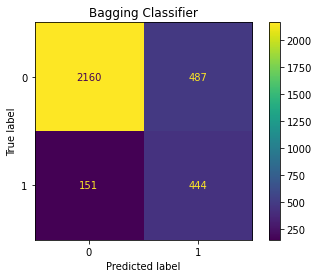

In [ ]:
# Build with bagging classifier. 
bag_y_pred = bag_clf.predict(X_test)

# Display the maxtrix.
disp = ConfusionMatrixDisplay.from_predictions(y_test, bag_y_pred)
disp.ax_.set_title('Bagging Classifier')

Text(0.5, 1.0, 'Logistic Regression')

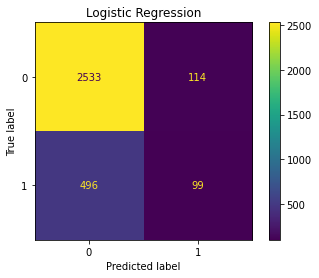

In [ ]:
# Build with logistic regression. 
log_y_pred = logistic.predict(X_test)

# Display the maxtrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, log_y_pred)
disp.ax_.set_title('Logistic Regression')

####**5.10.2 ROC Curve**

Text(0, 0.5, 'True Positive Rate')

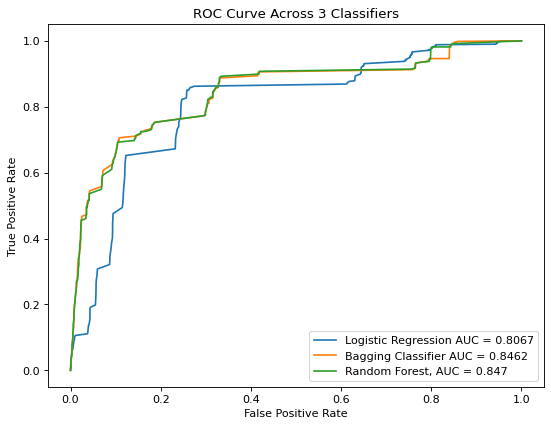

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
from sklearn import datasets


from matplotlib.pyplot import figure
# Set up plot size
figure(figsize=(8, 6), dpi=80)

# Fit logistic regression model and plot ROC curve.
logistic.fit(X_train, y_train)
y_pred = logistic.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label = 'Logistic Regression AUC = ' + str(auc))

# Fit bagging classifier model and plot ROC curve.
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label = 'Bagging Classifier AUC = ' + str(auc))

# Fit random forest classifier model and plot ROC curve
forest_clf.fit(X_train, y_train)
y_pred = forest_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label = 'Random Forest, AUC = ' + str(auc))

#add legend
plt.legend()
plt.title('ROC Curve Across 3 Classifiers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

##**6. Hyper Parameter Tuning**
We will apply 3 methods on both Random Forest and XGBoost, since they are the models that enjoyed a relatively high balanced accuracy score. 

####**6.1 Building Full Pipelines**

In [ ]:
# Build two full pipelines: forest_pipeline and xgboost_pipeline.
forest_pipeline = Pipeline([
    ("Preprocessing", preprocess_pipeline),
    ("Random_forest", RandomForestClassifier(n_estimators = 100, random_state = 11)),
])

forest_pipeline

Pipeline(steps=[('Preprocessing',
                 Pipeline(steps=[('Preprocessing',
                                  ColumnTransformer(transformers=[('Numerical',
                                                                   Pipeline(steps=[('Imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('Scaler',
                                                                                    StandardScaler())]),
                                                                   ['Term',
                                                                    'NoEmp',
                                                                    'RetainedJob',
                                                                    'SBA_Appv']),
                                                                  ('Categorical',
                                                                   Pipeline(steps=[('Imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('Cat_Encoder',
                                                                                    OneHotEncoder(drop='first',
                                                                                                  sparse=False))]),
                                                                   ['UrbanRural',
                                                                    'NewOrExist',
                                                                    'Franchised',
                                                                    'StateSame',
                                                                    'FinanCrisis',
                                                                    'FullDisbursed',
                                                                    'RevLineCredit',
                                                                    'LowDocP'])])),
                                 ('Select',
                                  SequentialFeatureSelector(estimator=LinearRegression(),
                                                            n_features_to_select=1))])),
                ('Random_forest', RandomForestClassifier(random_state=11))])

In [ ]:
xgboost_pipeline = Pipeline([
    ("Preprocessing", preprocess_pipeline),
    ("XGBoost", XGBClassifier(n_estimators = 100, random_state = 11)),
])

xgboost_pipeline

Pipeline(steps=[('Preprocessing',
                 Pipeline(steps=[('Preprocessing',
                                  ColumnTransformer(transformers=[('Numerical',
                                                                   Pipeline(steps=[('Imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('Scaler',
                                                                                    StandardScaler())]),
                                                                   ['Term',
                                                                    'NoEmp',
                                                                    'RetainedJob',
                                                                    'SBA_Appv']),
                                                                  ('Categorical',
                                                                   Pipeline(steps=[('Imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('Cat_Encoder',
                                                                                    OneHotEncoder(drop='first',
                                                                                                  sparse=False))]),
                                                                   ['UrbanRural',
                                                                    'NewOrExist',
                                                                    'Franchised',
                                                                    'StateSame',
                                                                    'FinanCrisis',
                                                                    'FullDisbursed',
                                                                    'RevLineCredit',
                                                                    'LowDocP'])])),
                                 ('Select',
                                  SequentialFeatureSelector(estimator=LinearRegression(),
                                                            n_features_to_select=1))])),
                ('XGBoost', XGBClassifier(random_state=11))])

In [ ]:
# Check the parameters in forest_pipeline.
forest_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'Preprocessing', 'Random_forest', 'Preprocessing__memory', 'Preprocessing__steps', 'Preprocessing__verbose', 'Preprocessing__Preprocessing', 'Preprocessing__Select', 'Preprocessing__Preprocessing__n_jobs', 'Preprocessing__Preprocessing__remainder', 'Preprocessing__Preprocessing__sparse_threshold', 'Preprocessing__Preprocessing__transformer_weights', 'Preprocessing__Preprocessing__transformers', 'Preprocessing__Preprocessing__verbose', 'Preprocessing__Preprocessing__verbose_feature_names_out', 'Preprocessing__Preprocessing__Numerical', 'Preprocessing__Preprocessing__Categorical', 'Preprocessing__Preprocessing__Numerical__memory', 'Preprocessing__Preprocessing__Numerical__steps', 'Preprocessing__Preprocessing__Numerical__verbose', 'Preprocessing__Preprocessing__Numerical__Imputer', 'Preprocessing__Preprocessing__Numerical__Scaler', 'Preprocessing__Preprocessing__Numerical__Imputer__add_indicator', 'Preprocessing__Preprocessing__Numerical__Imputer_

In [ ]:
# Show all the parameters in axgboost_pipeline. 
xgboost_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'Preprocessing', 'XGBoost', 'Preprocessing__memory', 'Preprocessing__steps', 'Preprocessing__verbose', 'Preprocessing__Preprocessing', 'Preprocessing__Select', 'Preprocessing__Preprocessing__n_jobs', 'Preprocessing__Preprocessing__remainder', 'Preprocessing__Preprocessing__sparse_threshold', 'Preprocessing__Preprocessing__transformer_weights', 'Preprocessing__Preprocessing__transformers', 'Preprocessing__Preprocessing__verbose', 'Preprocessing__Preprocessing__verbose_feature_names_out', 'Preprocessing__Preprocessing__Numerical', 'Preprocessing__Preprocessing__Categorical', 'Preprocessing__Preprocessing__Numerical__memory', 'Preprocessing__Preprocessing__Numerical__steps', 'Preprocessing__Preprocessing__Numerical__verbose', 'Preprocessing__Preprocessing__Numerical__Imputer', 'Preprocessing__Preprocessing__Numerical__Scaler', 'Preprocessing__Preprocessing__Numerical__Imputer__add_indicator', 'Preprocessing__Preprocessing__Numerical__Imputer__copy'

###**6.2 Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Set up grid. 
forest_param_grid = [ 
    {'Random_forest__max_depth': [2, 5, 10], 
     'Random_forest__min_samples_leaf': [2, 5, 10], 
     'Random_forest__max_features': ["sqrt", "log2", None]}, 
    ]

# Fit data into grid search.
grid_search = GridSearchCV(forest_pipeline, forest_param_grid, cv = 10, scoring = 'balanced_accuracy')
grid_search.fit(df_X, df_y)

grid_search.best_estimator_
forest_cv_res = pd.DataFrame(grid_search.cv_results_)
forest_cv_res.sort_values(by="mean_test_score", ascending = False, inplace = True)
forest_cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Random_forest__max_depth,param_Random_forest__max_features,param_Random_forest__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
24,0.619331,0.053325,0.031779,0.002685,10,None,2,"{'Random_forest__max_depth': 10, 'Random_fores...",0.877932,0.868747,0.848128,0.880078,0.882960,0.875482,0.830430,0.845115,0.862600,0.819256,0.859073,0.021126,1
21,0.607605,0.012884,0.031466,0.002000,10,log2,2,"{'Random_forest__max_depth': 10, 'Random_fores...",0.877932,0.868747,0.848128,0.880078,0.882960,0.875482,0.830430,0.845115,0.862600,0.819256,0.859073,0.021126,1
18,0.632425,0.023400,0.032902,0.002960,10,sqrt,2,"{'Random_forest__max_depth': 10, 'Random_fores...",0.877932,0.868747,0.848128,0.880078,0.882960,0.875482,0.830430,0.845115,0.862600,0.819256,0.859073,0.021126,1
25,0.623233,0.034876,0.032407,0.002083,10,None,5,"{'Random_forest__max_depth': 10, 'Random_fores...",0.875410,0.868747,0.844705,0.871699,0.880167,0.873590,0.832592,0.842321,0.864132,0.825474,0.857884,0.018720,4
22,0.605623,0.014135,0.033036,0.003947,10,log2,5,"{'Random_forest__max_depth': 10, 'Random_fores...",0.875410,0.868747,0.844705,0.871699,0.880167,0.873590,0.832592,0.842321,0.864132,0.825474,0.857884,0.018720,4


In [ ]:
# Set up Grid.
xgboost_param_grid = [ 
    {'XGBoost__max_depth': [2, 5, 10], 
     'XGBoost__max_leaf_nodes': [2, 5, 10], 
     'XGBoost__max_features': ["sqrt", "log2", None]}, 
    ]

grid_search = GridSearchCV(xgboost_pipeline, xgboost_param_grid, cv = 10, scoring = 'balanced_accuracy')
grid_search.fit(df_X, df_y)

grid_search.best_estimator_
xgboost_cv_res = pd.DataFrame(grid_search.cv_results_)
xgboost_cv_res.sort_values(by="mean_test_score", ascending = False, inplace = True)
xgboost_cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_XGBoost__max_depth,param_XGBoost__max_features,param_XGBoost__max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
13,0.524620,0.116333,0.014929,0.002623,5,log2,5,"{'XGBoost__max_depth': 5, 'XGBoost__max_featur...",0.868712,0.873704,0.849032,0.871427,0.872417,0.867732,0.84683,0.845115,0.860437,0.844396,0.85998,0.011693,1
17,0.535634,0.064831,0.015352,0.002469,5,None,10,"{'XGBoost__max_depth': 5, 'XGBoost__max_featur...",0.868712,0.873704,0.849032,0.871427,0.872417,0.867732,0.84683,0.845115,0.860437,0.844396,0.85998,0.011693,1
15,0.441791,0.006103,0.013007,0.000403,5,None,2,"{'XGBoost__max_depth': 5, 'XGBoost__max_featur...",0.868712,0.873704,0.849032,0.871427,0.872417,0.867732,0.84683,0.845115,0.860437,0.844396,0.85998,0.011693,1
14,0.535181,0.127141,0.014899,0.002540,5,log2,10,"{'XGBoost__max_depth': 5, 'XGBoost__max_featur...",0.868712,0.873704,0.849032,0.871427,0.872417,0.867732,0.84683,0.845115,0.860437,0.844396,0.85998,0.011693,1
12,0.449522,0.016231,0.014415,0.002093,5,log2,2,"{'XGBoost__max_depth': 5, 'XGBoost__max_featur...",0.868712,0.873704,0.849032,0.871427,0.872417,0.867732,0.84683,0.845115,0.860437,0.844396,0.85998,0.011693,1


In [ ]:
gs_forest = forest_cv_res[['params', 'mean_test_score']].head(3)
gs_xgboost = xgboost_cv_res[['params', 'mean_test_score']].head(3)
frames = [gs_forest, gs_xgboost]
grid_search_result = pd.concat(frames)
grid_search_result

,params,mean_test_score
24,"{'Random_forest__max_depth': 10, 'Random_fores...",0.859073
21,"{'Random_forest__max_depth': 10, 'Random_fores...",0.859073
18,"{'Random_forest__max_depth': 10, 'Random_fores...",0.859073
13,"{'XGBoost__max_depth': 5, 'XGBoost__max_featur...",0.859980
17,"{'XGBoost__max_depth': 5, 'XGBoost__max_featur...",0.859980
15,"{'XGBoost__max_depth': 5, 'XGBoost__max_featur...",0.859980


###**6.3 Random Search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import loguniform

# Setting the parameter grid for random search

forest_param_distribs = {'Random_forest__max_depth': randint(low=3, high=50),
                  'Random_forest__min_samples_leaf': randint(low=2, high=20)}

# Setting up the random search strategy
forest_rnd_search = RandomizedSearchCV(
    forest_pipeline, param_distributions = forest_param_distribs, n_iter = 10, cv = 3,
    scoring='balanced_accuracy', random_state = 11)

# Fitting the model with X, y 
forest_rnd_search.fit(df_X, df_y)
print('The best parameters are ', forest_rnd_search.best_params_)

# Finding out the mean test score
forest_rnd_cv_res = pd.DataFrame(forest_rnd_search.cv_results_)
forest_rnd_cv_res.sort_values(by = "mean_test_score", ascending = False, inplace = True)
forest_rnd_cv_res.head()

The best parameters are  {'Random_forest__max_depth': 47, 'Random_forest__min_samples_leaf': 6}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Random_forest__max_depth,param_Random_forest__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,0.476734,0.008408,0.058260,0.002524,47,6,"{'Random_forest__max_depth': 47, 'Random_fores...",0.863107,0.867430,0.852166,0.860901,0.006424,1
3,0.473580,0.008330,0.058679,0.001117,36,9,"{'Random_forest__max_depth': 36, 'Random_fores...",0.862837,0.865674,0.851247,0.859919,0.006241,2
0,0.492809,0.019789,0.056593,0.002190,28,18,"{'Random_forest__max_depth': 28, 'Random_fores...",0.859487,0.868078,0.847897,0.858487,0.008269,3
1,0.482642,0.013616,0.055628,0.002602,30,19,"{'Random_forest__max_depth': 30, 'Random_fores...",0.859487,0.868078,0.847897,0.858487,0.008269,3
5,0.468060,0.004841,0.053286,0.000161,31,18,"{'Random_forest__max_depth': 31, 'Random_fores...",0.859487,0.868078,0.847897,0.858487,0.008269,3


In [ ]:
# Setting the parameter grid for random search

xgboost_param_distribs = {'XGBoost__max_depth': randint(low=3, high=50),
                  'XGBoost__max_leaf_nodes': randint(low=2, high=20)}

# Setting up the random search strategy
xgboost_rnd_search = RandomizedSearchCV(
    xgboost_pipeline, param_distributions = xgboost_param_distribs, n_iter = 10, cv = 3,
    scoring='balanced_accuracy', random_state = 11)

# Fitting the model with X, y 
xgboost_rnd_search.fit(df_X, df_y)

# Finding best score
xgboost_rnd_search_rmse = -xgboost_rnd_search.best_score_

# Finding best parameter
print('The best parameters are ', xgboost_rnd_search.best_params_)

# Finding out the mean test score
xgboost_rnd_cv_res = pd.DataFrame(xgboost_rnd_search.cv_results_)
xgboost_rnd_cv_res.sort_values(by = "mean_test_score", ascending = False, inplace = True)
xgboost_rnd_cv_res.head()

The best parameters are  {'XGBoost__max_depth': 21, 'XGBoost__max_leaf_nodes': 15}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_XGBoost__max_depth,param_XGBoost__max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
4,0.600264,0.025083,0.036194,0.000804,21,15,"{'XGBoost__max_depth': 21, 'XGBoost__max_leaf_...",0.865431,0.869753,0.847627,0.860937,0.009576,1
0,0.639908,0.020559,0.039638,0.000616,28,18,"{'XGBoost__max_depth': 28, 'XGBoost__max_leaf_...",0.865431,0.869564,0.847627,0.860874,0.009518,2
1,0.652865,0.002228,0.044074,0.000895,30,19,"{'XGBoost__max_depth': 30, 'XGBoost__max_leaf_...",0.865431,0.869564,0.847627,0.860874,0.009518,2
3,0.683989,0.003199,0.043617,0.000884,36,9,"{'XGBoost__max_depth': 36, 'XGBoost__max_leaf_...",0.865431,0.869564,0.847627,0.860874,0.009518,2
5,0.657849,0.025307,0.043779,0.002908,31,18,"{'XGBoost__max_depth': 31, 'XGBoost__max_leaf_...",0.865431,0.869564,0.847627,0.860874,0.009518,2


In [ ]:
rnd_forest = forest_rnd_cv_res[['params', 'mean_test_score']].head(3)
rnd_xgboost = xgboost_rnd_cv_res[['params', 'mean_test_score']].head(3)
frames = [rnd_forest, rnd_xgboost]
random_search_result = pd.concat(frames)
random_search_result

,params,mean_test_score
7,"{'Random_forest__max_depth': 47, 'Random_fores...",0.860901
3,"{'Random_forest__max_depth': 36, 'Random_fores...",0.859919
0,"{'Random_forest__max_depth': 28, 'Random_fores...",0.858487
4,"{'XGBoost__max_depth': 21, 'XGBoost__max_leaf_...",0.860937
0,"{'XGBoost__max_depth': 28, 'XGBoost__max_leaf_...",0.860874
1,"{'XGBoost__max_depth': 30, 'XGBoost__max_leaf_...",0.860874


###**6.4 Having Grid Search**

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Setting the parameter grid for Havling Grid Search
forest_param_grid = [
    {'Random_forest__max_depth': [10, 15],
     'Random_forest__min_samples_leaf': [6, 8, 10]},
]


# Setting up the halving strategy 
forest_halving_grid_search = HalvingGridSearchCV(forest_pipeline, forest_param_grid, cv = 3, 
                                    min_resources = 'exhaust', 
                                    scoring='balanced_accuracy')

# Fitting the model with X, y 
forest_halving_grid_search.fit(df_X, df_y)
print('The best parameters are ', forest_halving_grid_search.best_params_)

# Finding out the mean test score
forest_halving_grid_cv_res = pd.DataFrame(forest_halving_grid_search.cv_results_) 
forest_halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
forest_halving_grid_cv_res.head()

The best parameters are  {'Random_forest__max_depth': 10, 'Random_forest__min_samples_leaf': 8}


,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Random_forest__max_depth,param_Random_forest__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
6,1,9723,0.590845,0.015543,0.067603,0.003158,10,8,"{'Random_forest__max_depth': 10, 'Random_fores...",0.860324,0.870321,0.850139,0.860261,0.008239,1,0.864350,0.868335,0.865322,0.866002,0.001696
7,1,9723,0.598504,0.014408,0.074311,0.007841,15,8,"{'Random_forest__max_depth': 15, 'Random_fores...",0.860324,0.870321,0.850139,0.860261,0.008239,1,0.864350,0.868335,0.865322,0.866002,0.001696
1,0,3241,0.343210,0.001459,0.030994,0.000126,10,8,"{'Random_forest__max_depth': 10, 'Random_fores...",0.859896,0.877273,0.810130,0.849100,0.028454,3,0.861145,0.890638,0.857495,0.869759,0.014839
4,0,3241,0.334872,0.008695,0.030140,0.001123,15,8,"{'Random_forest__max_depth': 15, 'Random_fores...",0.859896,0.877273,0.810130,0.849100,0.028454,3,0.861145,0.890638,0.857495,0.869759,0.014839
0,0,3241,0.345368,0.019414,0.030352,0.001114,10,6,"{'Random_forest__max_depth': 10, 'Random_fores...",0.858577,0.877273,0.807592,0.847814,0.029447,5,0.866512,0.890638,0.862511,0.873220,0.012424


In [ ]:
# Setting the parameter grid for Havling Grid Search
xgboost_param_grid = [
    {'XGBoost__max_depth': [10, 15],
     'XGBoost__max_leaf_nodes': [6, 8, 10]}]

# Setting up the halving strategy 
xgboost_halving_grid_search = HalvingGridSearchCV(xgboost_pipeline, xgboost_param_grid, cv=3, 
                                    min_resources='exhaust', 
                                    scoring='balanced_accuracy')

# Fitting the model with X, y 
xgboost_halving_grid_search.fit(df_X, df_y)
print('The best parameters are ', xgboost_halving_grid_search.best_params_)

# Finding out the mean test score
xgboost_halving_grid_cv_res = pd.DataFrame(xgboost_halving_grid_search.cv_results_) 
xgboost_halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
xgboost_halving_grid_cv_res.head()

The best parameters are  {'XGBoost__max_depth': 10, 'XGBoost__max_leaf_nodes': 8}


,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_XGBoost__max_depth,param_XGBoost__max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
6,1,9723,0.523487,0.019728,0.033668,0.003154,10,8,"{'XGBoost__max_depth': 10, 'XGBoost__max_leaf_...",0.859784,0.868186,0.847627,0.858532,0.008440,1,0.862337,0.872955,0.873846,0.869713,0.005228
7,1,9723,0.483074,0.002412,0.028568,0.000421,10,10,"{'XGBoost__max_depth': 10, 'XGBoost__max_leaf_...",0.859784,0.868186,0.847627,0.858532,0.008440,1,0.862337,0.872955,0.873846,0.869713,0.005228
0,0,3241,0.428793,0.016115,0.022566,0.001207,10,6,"{'XGBoost__max_depth': 10, 'XGBoost__max_leaf_...",0.815623,0.827033,0.847455,0.830037,0.013168,3,0.871550,0.864933,0.872978,0.869820,0.003505
1,0,3241,0.245079,0.008578,0.015212,0.000954,10,8,"{'XGBoost__max_depth': 10, 'XGBoost__max_leaf_...",0.815623,0.827033,0.847455,0.830037,0.013168,3,0.871550,0.864933,0.872978,0.869820,0.003505
2,0,3241,0.251195,0.008044,0.016420,0.002620,10,10,"{'XGBoost__max_depth': 10, 'XGBoost__max_leaf_...",0.815623,0.827033,0.847455,0.830037,0.013168,3,0.871550,0.864933,0.872978,0.869820,0.003505


In [ ]:
halving_forest = forest_halving_grid_cv_res[['params', 'mean_test_score']].head(3)
halving_xgboost = xgboost_halving_grid_cv_res[['params', 'mean_test_score']].head(3)
frames = [halving_forest, halving_xgboost]
halving_grid_search_result = pd.concat(frames)
halving_grid_search_result

,params,mean_test_score
6,"{'Random_forest__max_depth': 10, 'Random_fores...",0.860261
7,"{'Random_forest__max_depth': 15, 'Random_fores...",0.860261
1,"{'Random_forest__max_depth': 10, 'Random_fores...",0.849100
6,"{'XGBoost__max_depth': 10, 'XGBoost__max_leaf_...",0.858532
7,"{'XGBoost__max_depth': 10, 'XGBoost__max_leaf_...",0.858532
0,"{'XGBoost__max_depth': 10, 'XGBoost__max_leaf_...",0.830037


In [ ]:
# 6.1 - 6.4 Finding
print('Based on the mean_test_score, the more effective strategy for XGBoost is Random Search', end ='.') 
print("The best parameters are", xgboost_rnd_search.best_params_)
print("The accuracy at the best parameter is", xgboost_rnd_search.score(df_X, df_y).round(3))

Based on the mean_test_score, the more effective strategy for XGBoost is Random Search.The best parameters are {'XGBoost__max_depth': 21, 'XGBoost__max_leaf_nodes': 15}
The accuracy at the best parameter is 0.866


In [ ]:
print('Based on the mean_test_score, the more effective strategies for RandomForest are Random Search & Halving Grid', end ='.')
print("The best parameters in halving grid search are", forest_halving_grid_search.best_params_)
print("The accuracy at the best parameter in halving grid search is", forest_halving_grid_search.score(df_X, df_y).round(3))
print("The best parameters in random search are", forest_rnd_search.best_params_)
print("The accuracy at the best parameter in random search is", forest_rnd_search.score(df_X, df_y).round(3))

Based on the mean_test_score, the more effective strategies for RandomForest are Random Search & Halving Grid.The best parameters in halving grid search are {'Random_forest__max_depth': 10, 'Random_forest__min_samples_leaf': 8}
The accuracy at the best parameter in halving grid search is 0.866
The best parameters in random search are {'Random_forest__max_depth': 47, 'Random_forest__min_samples_leaf': 6}
The accuracy at the best parameter in random search is 0.869


##**7. Cost Matrix Application**

In [ ]:
# Apply cost matrix (5 times more costly to predict a false positive than false negative.)
# Explore in Random Forest classifier. 
# Include random search first. 
from sklearn.metrics import make_scorer, confusion_matrix
def default_cost(y_true, y_pred): 
  cm = confusion_matrix(y_true, y_pred)
  return cm[1,0] * 5 + cm[0,1] * 1

cost_scorer = make_scorer(default_cost, greater_is_better = False)

forest_costs = cross_val_score(forest_clf, X_train, y_train, cv = 10, scoring=cost_scorer)

cm_forest_rnd_search = RandomizedSearchCV(
    forest_pipeline, param_distributions = forest_param_distribs, n_iter = 10, cv = 3,
    scoring='balanced_accuracy', random_state = 11)

cm_forest_rnd_search.fit(df_X, df_y)

cv_res = pd.DataFrame(cm_forest_rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Random_forest__max_depth,param_Random_forest__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,0.496399,0.008124,0.059413,0.003283,47,6,"{'Random_forest__max_depth': 47, 'Random_fores...",0.863107,0.867430,0.852166,0.860901,0.006424,1
3,0.489671,0.002946,0.058578,0.004595,36,9,"{'Random_forest__max_depth': 36, 'Random_fores...",0.862837,0.865674,0.851247,0.859919,0.006241,2
0,0.483208,0.003693,0.054018,0.000278,28,18,"{'Random_forest__max_depth': 28, 'Random_fores...",0.859487,0.868078,0.847897,0.858487,0.008269,3
1,0.470487,0.003965,0.055505,0.003211,30,19,"{'Random_forest__max_depth': 30, 'Random_fores...",0.859487,0.868078,0.847897,0.858487,0.008269,3
5,0.488076,0.013576,0.054915,0.001725,31,18,"{'Random_forest__max_depth': 31, 'Random_fores...",0.859487,0.868078,0.847897,0.858487,0.008269,3


In [ ]:
print("The best parameters are", cm_forest_rnd_search.best_params_)
print("The accuracy at the best parameter is", cm_forest_rnd_search.score(df_X, df_y).round(3))

The best parameters are {'Random_forest__max_depth': 47, 'Random_forest__min_samples_leaf': 6}
The accuracy at the best parameter is 0.869


In [ ]:
# We now look at halving grid search strategy.
cm_forest_halving_grid_search = HalvingGridSearchCV(forest_pipeline, forest_param_grid, cv = 3, 
                                    min_resources = 'exhaust', 
                                    scoring='balanced_accuracy')

cm_forest_halving_grid_search.fit(df_X, df_y)

cv_res = pd.DataFrame(cm_forest_halving_grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Random_forest__max_depth,param_Random_forest__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
6,1,9723,0.508271,0.024631,0.059690,0.005101,15,10,"{'Random_forest__max_depth': 15, 'Random_fores...",0.854948,0.860027,0.850869,0.855281,0.003746,1,0.859203,0.859203,0.867308,0.861905,0.003821
7,1,9723,0.505744,0.011608,0.058070,0.001472,10,10,"{'Random_forest__max_depth': 10, 'Random_fores...",0.854948,0.860027,0.850869,0.855281,0.003746,1,0.859203,0.859203,0.867308,0.861905,0.003821
2,0,3241,0.358113,0.007050,0.034512,0.002750,10,10,"{'Random_forest__max_depth': 10, 'Random_fores...",0.855351,0.870359,0.820814,0.848842,0.020744,3,0.858883,0.859739,0.844828,0.854483,0.006837
5,0,3241,0.365207,0.011352,0.033677,0.001858,15,10,"{'Random_forest__max_depth': 15, 'Random_fores...",0.855351,0.870359,0.816007,0.847239,0.022919,4,0.858883,0.859739,0.843924,0.854182,0.007262
1,0,3241,0.350370,0.031644,0.033911,0.004406,10,8,"{'Random_forest__max_depth': 10, 'Random_fores...",0.856471,0.867946,0.809832,0.844750,0.025131,5,0.857789,0.855659,0.841667,0.851705,0.007151


In [ ]:
print("The best parameters are", cm_forest_halving_grid_search.best_params_)
print("The accuracy at the best parameter is", cm_forest_halving_grid_search.score(df_X, df_y).round(3))

The best parameters are {'Random_forest__max_depth': 15, 'Random_forest__min_samples_leaf': 10}
The accuracy at the best parameter is 0.864


In [ ]:
# XGBoost Model
cm_xgboost_rnd_search = RandomizedSearchCV(
    xgboost_pipeline, param_distributions = xgboost_param_distribs, n_iter = 10, cv = 3,
    scoring='balanced_accuracy', random_state = 11)

cm_xgboost_rnd_search.fit(df_X, df_y)

cv_res = pd.DataFrame(cm_xgboost_rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_XGBoost__max_depth,param_XGBoost__max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
4,0.650934,0.019329,0.044603,0.009612,21,15,"{'XGBoost__max_depth': 21, 'XGBoost__max_leaf_...",0.865431,0.869753,0.847627,0.860937,0.009576,1
0,0.673103,0.018677,0.042127,0.000433,28,18,"{'XGBoost__max_depth': 28, 'XGBoost__max_leaf_...",0.865431,0.869564,0.847627,0.860874,0.009518,2
1,0.651586,0.019324,0.041972,0.001225,30,19,"{'XGBoost__max_depth': 30, 'XGBoost__max_leaf_...",0.865431,0.869564,0.847627,0.860874,0.009518,2
3,0.671750,0.019110,0.043995,0.000873,36,9,"{'XGBoost__max_depth': 36, 'XGBoost__max_leaf_...",0.865431,0.869564,0.847627,0.860874,0.009518,2
5,0.671287,0.015288,0.043001,0.002160,31,18,"{'XGBoost__max_depth': 31, 'XGBoost__max_leaf_...",0.865431,0.869564,0.847627,0.860874,0.009518,2


In [ ]:
print("The best parameters are", cm_xgboost_rnd_search.best_params_)
print("The accuracy at the best parameter is", cm_xgboost_rnd_search.score(df_X, df_y).round(3))

The best parameters are {'XGBoost__max_depth': 21, 'XGBoost__max_leaf_nodes': 15}
The accuracy at the best parameter is 0.866


##**8. Threshold Tuning**

In [ ]:
# Obtain the best strategy so far.
model = forest_rnd_search.best_estimator_

# Predict the Cost. 
print('The cost under standard prediction strategy is %d.' % default_cost(y_test, model.predict(test_data)))

The cost under standard prediction strategy is 859.


In [ ]:
# Define a function that take a threshold and return a function. 

def predict_labels(pos_probs, threshold):
	return np.where(pos_probs >= threshold, 1, 0)

class_probabilities = model.predict_proba(test_data)	

probs = class_probabilities[:, 1]

thresholds = np.arange(0, 1, 0.001)

scores = [default_cost(y_test, predict_labels(probs, t)) for t in thresholds]

ix = np.argmin(scores)

print('After optimization, threshold should be set at %.3f, \
	which will lead to cost of misclassification of %d.' % (thresholds[ix], scores[ix]))

After optimization, threshold should be set at 0.199, 	which will lead to cost of misclassification of 644.


In [ ]:
# We look at the second best strategy (halving search) as well. 
model = forest_halving_grid_search.best_estimator_

# Predict the Cost. 
print('The cost under standard prediction strategy is %d.' % default_cost(y_test, model.predict(test_data)))

The cost under standard prediction strategy is 862.


In [ ]:
# Define a function that take a threshold and return a function. 

def predict_labels(pos_probs, threshold):
	return np.where(pos_probs >= threshold, 1, 0)

class_probabilities = model.predict_proba(test_data)	

probs = class_probabilities[:, 1]

thresholds = np.arange(0, 1, 0.001)

scores = [default_cost(y_test, predict_labels(probs, t)) for t in thresholds]

ix = np.argmin(scores)

print('After optimization, threshold should be set at %.3f, \
	which will lead to cost of misclassification of %d.' % (thresholds[ix], scores[ix]))

After optimization, threshold should be set at 0.240, 	which will lead to cost of misclassification of 650.


In [ ]:
# We look at XGBoost Mode.
model = xgboost_rnd_search.best_estimator_

# Predict the Cost. 
print('The cost under standard prediction strategy is %d.' % default_cost(y_test, model.predict(test_data)))

The cost under standard prediction strategy is 913.


In [ ]:
# Define a function that take a threshold and return a function. 

def predict_labels(pos_probs, threshold):
	return np.where(pos_probs >= threshold, 1, 0)

class_probabilities = model.predict_proba(test_data)	

probs = class_probabilities[:, 1]

thresholds = np.arange(0, 1, 0.001)

scores = [default_cost(y_test, predict_labels(probs, t)) for t in thresholds]

ix = np.argmin(scores)

print('After optimization, threshold should be set at %.3f, \
	which will lead to cost of misclassification of %d.' % (thresholds[ix], scores[ix]))

After optimization, threshold should be set at 0.169, 	which will lead to cost of misclassification of 648.


In [ ]:
# Develop a dataframe with accuracy scores and rmse. 
d = {'Best Parameters': [forest_halving_grid_search.best_params_, forest_rnd_search.best_params_, 
                         xgboost_rnd_search.best_params_], 
    'Score': [forest_halving_grid_search.score(df_X, df_y).round(3), forest_rnd_search.score(df_X, df_y).round(3),
              xgboost_rnd_search.score(df_X, df_y).round(3)],
     'CM-Best Parameters': [cm_forest_halving_grid_search.best_params_,  cm_forest_rnd_search.best_params_, 
                            cm_xgboost_rnd_search.best_params_],
    'CM-Score': [cm_forest_halving_grid_search.score(df_X, df_y).round(3), 
                 cm_forest_rnd_search.score(df_X, df_y).round(3), 
                  cm_xgboost_rnd_search.score(df_X, df_y).round(3)],
    'Threshold': [0.240, 0.199, 0.169],
    'Cost Before': [862, 859, 913],
    'Cost After': [650, 644, 648]
     }
finaltable = pd.DataFrame(data = d)
finaltable = finaltable.rename(index={0: 'Random Forest with Halving Grid Search', 
                                        1: 'Random Forest with Random Search', 
                                        2: 'XGBoost with Random Search'})
finaltable.head()

,Best Parameters,Score,CM-Best Parameters,CM-Score,Threshold,Cost Before,Cost After
Random Forest with Halving Grid Search,"{'Random_forest__max_depth': 10, 'Random_fores...",0.866,"{'Random_forest__max_depth': 15, 'Random_fores...",0.864,0.240,862,650
Random Forest with Random Search,"{'Random_forest__max_depth': 47, 'Random_fores...",0.869,"{'Random_forest__max_depth': 47, 'Random_fores...",0.869,0.199,859,644
XGBoost with Random Search,"{'XGBoost__max_depth': 21, 'XGBoost__max_leaf_...",0.866,"{'XGBoost__max_depth': 21, 'XGBoost__max_leaf_...",0.866,0.169,913,648


|index|Best Parameters|Score|CM-Best Parameters|CM-Score|Threshold|Cost Before|Cost After|
|---|---|---|---|---|---|---|---|
|Random Forest with Halving Grid Search|\{'Random\_forest\_\_max\_depth': 10, 'Random\_forest\_\_min\_samples\_leaf': 8\}|0\.866|\{'Random\_forest\_\_max\_depth': 10, 'Random\_forest\_\_min\_samples\_leaf': 6\}|0\.868|0\.24|862|650|
|Random Forest with Random Search|\{'Random\_forest\_\_max\_depth': 47, 'Random\_forest\_\_min\_samples\_leaf': 6\}|0\.869|\{'Random\_forest\_\_max\_depth': 47, 'Random\_forest\_\_min\_samples\_leaf': 6\}|0\.869|0\.199|859|644|
|XGBoost with Random Search|\{'XGBoost\_\_max\_depth': 21, 'XGBoost\_\_max\_leaf\_nodes': 15\}|0\.866|\{'XGBoost\_\_max\_depth': 21, 'XGBoost\_\_max\_leaf\_nodes': 15\}|0\.866|0\.169|913|648|

##**9. Conclusion**

We would make the following suggestions to SBA:
<br> 
1. After model comparison,  we have located that **Decision Tree, Voting, Stacking, and Random Forest** have been the best classifiers that achieve ***roughly the same*** balanced accuracy score in charge-off prediction.
2. If we need to pick one for any lending entity, we would choose **Random Forest Classifier** for producing the highest score **(0.87)**.
3. When locating the best hyper-parameters for the random forest, the result is {'max_depth': 47, 'min_samples_leaf': 6}, although it did not improve the accuracy score too much **(0.869)**.  
4. When applying cost matrix, the accuracy score did not change either, we would recommend banks to focus on how to **balance false positives and false negatives** for a better result. 
5. In threshold tuning, it is noticeable that the thresholds are around **0.20**, it might suggest that banks should be **less tolerant** of any “red flags” when it comes to borrowers defaulting on their loans. 

##**10. Ending Note**

###**10.1 Unselected Model**

1. Linear Regression: Ideally we could have done a linear regression analysis on Charge-off Amount, however, since we are doing a classification analysis in this project, linear regression could be done at another time.
2. Class balancing Strategies: The the number of 1 values in our y variable, compared to values of 0, is sufficient, so different balancing strategies were not applied.

###**10.2 Citations**

Here are some citations for information included in the notebook.

1. United States Census Bureau Annnual Report: https://www.census.gov/library/stories/2022/05/how-small-businesses-impact-economy.html#:~:text=Based%20on%20the%20SBA%20definition,according%20to%20County%20Business%20Patterns.

2. NerdWallet Article: https://www.nerdwallet.com/article/small-business/study-1-in-6-sba-small-business-administration-loans-fail

3. Federal Reserve: https://www.fedsmallbusiness.org/
